MLS Project  Catherine Quinlan: Energy project based on Speed of Turbine to calculate power supplied November 2020

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression # importing my tools in python 
from sklearn.metrics import r2_score
from scipy import stats
# Neural networks.
import tensorflow.keras as kr

data = pd.read_csv(r'C:\Users\35387\Desktop\Galway\python\powerproduction.csv',usecols= ['Speed','Power'])# importing the data

#df = pd.DataFrame(data, columns= ['Speed','Power'])

data.head() # checking data
print (data)

      Speed  Power
0     0.125  0.000
1     0.150  0.000
2     0.225  0.000
3     0.275  0.000
4     0.325  4.331
..      ...    ...
494  24.775  0.000
495  24.850  0.000
496  24.875  0.000
497  24.950  0.000
498  25.000  0.000

[499 rows x 2 columns]


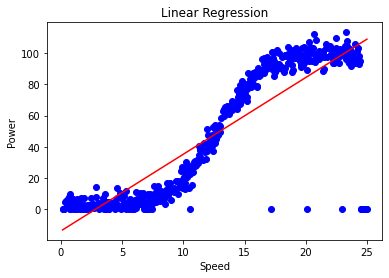

In [2]:
# Fitting Linear Regression to the dataset 
X = data.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array # adapted from https://towardsdatascience.com/linear-regression-in-6-lines
Y = data.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
lin = LinearRegression() 
  
lin.fit(X, Y) 



# Visualising the Linear Regression results 
plt.scatter(X, Y, color = 'blue') 
  
plt.plot(X, lin.predict(X), color = 'red') 
plt.title('Linear Regression') 
plt.xlabel('Speed') 
plt.ylabel('Power') 
  
plt.show() 

we do know that we have a correlation 

In [3]:
C = data.iloc[:, 0]  # values converts it into a numpy array # adapted from https://towardsdatascience.com/linear-regression-in-6-lines
D = data.iloc[:, 1] # -1 means that calculate the dimension of rows, but have 1 column



 We can see that our pattern above does not follow a linear model.From the graph we may also see that this is not a quadratic so we might try cubic below. From the high correlation we can use polynomial regression in future predictions 

if we want to atttempt a linear prediction 

In [4]:
mymodel = np.poly1d(np.polyfit(C, D, 1))

polyelec = mymodel(1)
print('with wind speeds of 1  using linear function we get',+polyelec)

with wind speeds of 1  using linear function we get -9.088838897647186


Using the linear function through the polyfit we can see that it is not correct with negative electricity

In [5]:

slope, intercept, r, p, std_err = stats.linregress(C, D)

def myfunc(x):
  return slope * C + intercept

mymodel = list(map(myfunc, C))

print('the linear correlation is',+r)

print('the slope is ',+slope,'the intercept is ',+intercept)
speed = myfunc(1)
print ('when windspeed is 1 then electricity  is',+speed)

the linear correlation is 0.8534843252851266
the slope is  4.924368989043673 the intercept is  -14.013207886690871
when windspeed is 1 then electricity  is 0      -13.397662
1      -13.274553
2      -12.905225
3      -12.659006
4      -12.412788
          ...    
494    107.988034
495    108.357361
496    108.480471
497    108.849798
498    109.096017
Name: Speed, Length: 499, dtype: float64


We can see that any linear regression is not a good fit as even using the intercept ans slope values my electricity prediction is negative 13.39 which is incorrect

==========================================================================================

  **POLYNOMIALS**

We might try plotting  our data against a cubic function  below:
    

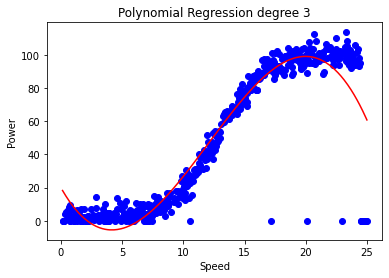

In [6]:
# Fitting Polynomial Regression to the dataset 
from sklearn.preprocessing import PolynomialFeatures 
  
poly = PolynomialFeatures(degree = 3) 
X_poly = poly.fit_transform(X) 
  
poly.fit(X_poly, Y) 
lin2 = LinearRegression() 
lin2.fit(X_poly, Y)
plt.show()

# Visualising the Polynomial Regression results 
plt.scatter(X, Y, color = 'blue') 
  
plt.plot(X, lin2.predict(poly.fit_transform(X)), color = 'red') 
plt.title('Polynomial Regression degree 3') 
plt.xlabel('Speed') 
plt.ylabel('Power') 
  
plt.show() 


**PREDICTING WITH POLYNOMIALS:**

To the power of 3 :
    

In [7]:

mymodel = np.poly1d(np.polyfit(C, D, 3))

polyelec = mymodel(1)
print('with wind speeds of 1  using cubic function we get',+polyelec)

with wind speeds of 1  using cubic function we get 8.548797038488924


It seems to be more in line with our points. We might also try to the power of 4.

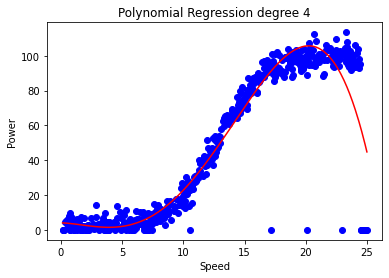

In [8]:
# Fitting Polynomial Regression to the dataset 
from sklearn.preprocessing import PolynomialFeatures 
  
poly = PolynomialFeatures(degree = 4) 
X_poly = poly.fit_transform(X) 
  
poly.fit(X_poly, Y) 
lin2 = LinearRegression() 
lin2.fit(X_poly, Y)
plt.show()

# Visualising the Polynomial Regression results 
plt.scatter(X, Y, color = 'blue') 
  
plt.plot(X, lin2.predict(poly.fit_transform(X)), color = 'red') 
plt.title('Polynomial Regression degree 4') 
plt.xlabel('Speed') 
plt.ylabel('Power') 
  
plt.show() 


In [9]:

mymodel = np.poly1d(np.polyfit(C, D, 4))

polyelec = mymodel(1)
print('with polynomial to the power of 4 wind speeds of 1 we get',+polyelec)

with polynomial to the power of 4 wind speeds of 1 we get 3.4961699650694014


Analysis:

Our polynomials to the power of 3 or 4 are close in relation to ourplotted  data.However We can see that at the beginning and end they does not correspond to our pattern.

We should return to linear regression but include detail of 2 inputs

In [10]:
model = LinearRegression()
model.fit(X, Y)

LinearRegression()

In [11]:
r_sq = model.score(X, Y)
print('coefficient of determination:', r_sq)


print('intercept:', model.intercept_)

print('slope:', model.coef_)

coefficient of determination: 0.7284354935074081
intercept: [-14.01320789]
slope: [[4.92436899]]


Here we can see that if we view both x and y as inputs, we have a positive coefficient of .73 (this is the correlation coefficient squared)

**Using tenserflow and Keras:**

In [46]:
X = data.iloc[:, 0]#.values.reshape(-1, 1)  # values converts it into a numpy array # adapted from https://towardsdatascience.com/linear-regression-in-6-lines
Y = data.iloc[:, 1]#.values.reshape(-1, 1) 

In [47]:


train = pd.DataFrame()
test = pd.DataFrame()

from sklearn.model_selection import train_test_split
# Splitting the dataset into the Training set and Test set
 
train['x'], test['x'], train['y'], test['y'] = train_test_split(X, Y, test_size=1/5, random_state=0)

In [48]:
# Create a neural network with one neuron.
model = kr.models.Sequential()
model.add(kr.layers.Dense(1, input_shape=(1,), activation="linear", kernel_initializer='ones', bias_initializer='zeros'))
model.compile('adam', loss='mean_squared_error')

In [49]:
# Without training, let's have a look at the output.
lindata = pd.DataFrame()
lindata['x'] = np.linspace(0, 25.0,500)
lindata['y'] = model.predict(lindata['x'])

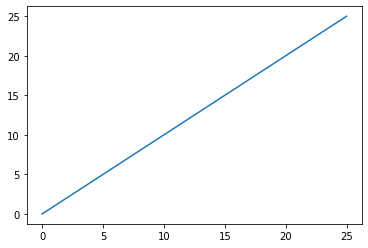

In [50]:
#Let's see what that looks like.
plt.plot(lindata['x'], lindata['y']);

In [51]:
# Train the neural network on our training data.
model.fit(train['x'], train['y'], epochs=500)

Epoch 1/500
13/13 [==============================] - 1s 666us/step - loss: 2386.1692
Epoch 2/500
13/13 [==============================] - 0s 834us/step - loss: 2469.8018
Epoch 3/500
13/13 [==============================] - 0s 667us/step - loss: 2661.0868
Epoch 4/500
13/13 [==============================] - 0s 583us/step - loss: 2552.9334
Epoch 5/500
13/13 [==============================] - 0s 667us/step - loss: 2488.8741
Epoch 6/500
13/13 [==============================] - 0s 667us/step - loss: 2451.8162
Epoch 7/500
13/13 [==============================] - 0s 667us/step - loss: 2493.3448
Epoch 8/500
13/13 [==============================] - 0s 750us/step - loss: 2286.8195
Epoch 9/500
13/13 [==============================] - 0s 667us/step - loss: 2491.3810
Epoch 10/500
13/13 [==============================] - 0s 667us/step - loss: 2454.1828
Epoch 11/500
13/13 [==============================] - 0s 667us/step - loss: 2399.3531
Epoch 12/500
13/13 [==============================] - 0s 750us/

13/13 [==============================] - 0s 750us/step - loss: 785.8301
Epoch 192/500
13/13 [==============================] - 0s 750us/step - loss: 737.1586
Epoch 193/500
13/13 [==============================] - 0s 750us/step - loss: 734.4521
Epoch 194/500
13/13 [==============================] - 0s 750us/step - loss: 731.0948
Epoch 195/500
13/13 [==============================] - 0s 750us/step - loss: 702.3833
Epoch 196/500
13/13 [==============================] - 0s 667us/step - loss: 764.0690
Epoch 197/500
13/13 [==============================] - 0s 750us/step - loss: 724.6457
Epoch 198/500
13/13 [==============================] - 0s 667us/step - loss: 730.8829
Epoch 199/500
13/13 [==============================] - 0s 750us/step - loss: 752.1967
Epoch 200/500
13/13 [==============================] - 0s 834us/step - loss: 680.1384
Epoch 201/500
13/13 [==============================] - 0s 750us/step - loss: 681.4386
Epoch 202/500
13/13 [==============================] - 0s 750us/step

13/13 [==============================] - 0s 667us/step - loss: 631.2295
Epoch 382/500
13/13 [==============================] - 0s 667us/step - loss: 520.6234
Epoch 383/500
13/13 [==============================] - 0s 667us/step - loss: 543.1947
Epoch 384/500
13/13 [==============================] - 0s 667us/step - loss: 564.3199
Epoch 385/500
13/13 [==============================] - 0s 834us/step - loss: 638.5548
Epoch 386/500
13/13 [==============================] - 0s 583us/step - loss: 464.4353
Epoch 387/500
13/13 [==============================] - 0s 583us/step - loss: 527.6517
Epoch 388/500
13/13 [==============================] - 0s 834us/step - loss: 550.9052
Epoch 389/500
13/13 [==============================] - 0s 583us/step - loss: 492.4738
Epoch 390/500
13/13 [==============================] - 0s 667us/step - loss: 534.2786
Epoch 391/500
13/13 [==============================] - 0s 583us/step - loss: 425.5579
Epoch 392/500
13/13 [==============================] - 0s 667us/step

This shows us that it is  some linear effect in the  function 

In [52]:

# Take four hand-picked values and see their predictions.# See what f says they are. 
model.predict([13.539, 20.220, 23.373, 25.0]) #actual returns are 65.889, 101.507,104.977

array([[ 54.91063 ],
       [ 81.41946 ],
       [ 93.92991 ],
       [100.385506]], dtype=float32)

In [23]:
#np.array([[f(i)] for i in [13,539, 20.220, 23.373, 25.0]])



NameError: name 'f' is not defined

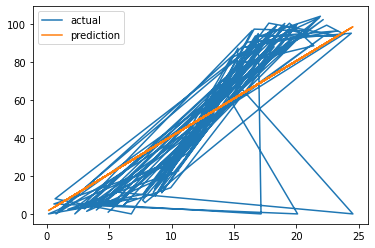

In [24]:
# Let's plot our predictions of the x values we trained on
plt.plot(test['x'], test['y'], label='actual')
plt.plot(test['x'], model.predict(test['x']), label='prediction')
plt.legend();

Here we can see the outliers are pulling the function out of shape.

**Using Sigmoid**

In [26]:
# Create a neural network with one neuron.
model = kr.models.Sequential()
model.add(kr.layers.Dense(1, input_shape=(1,), activation="sigmoid", kernel_initializer='ones', bias_initializer='zeros'))
model.compile('adam', loss='mean_squared_error')

In [27]:
# Without training, let's have a look at the output.
sigdata = pd.DataFrame()
sigdata['x'] = np.linspace(0, 25.0,500)
sigdata['y'] = model.predict(sigdata['x'])

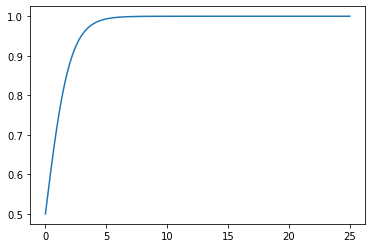

In [28]:
 #Let's see what that looks like.
plt.plot(sigdata['x'], sigdata['y']);

In [29]:
# Train the neural network on our training data.
model.fit(train['x'], train['y'], epochs=500)

Epoch 1/500
13/13 [==============================] - 0s 750us/step - loss: 3842.5269
Epoch 2/500
13/13 [==============================] - 0s 750us/step - loss: 3785.8129
Epoch 3/500
13/13 [==============================] - 0s 834us/step - loss: 4112.2955
Epoch 4/500
13/13 [==============================] - 0s 667us/step - loss: 3941.6394
Epoch 5/500
13/13 [==============================] - 0s 667us/step - loss: 3834.5761
Epoch 6/500
13/13 [==============================] - 0s 667us/step - loss: 4054.1652
Epoch 7/500
13/13 [==============================] - 0s 583us/step - loss: 4112.3857
Epoch 8/500
13/13 [==============================] - 0s 834us/step - loss: 3707.7528
Epoch 9/500
13/13 [==============================] - 0s 583us/step - loss: 4010.8441
Epoch 10/500
13/13 [==============================] - 0s 750us/step - loss: 4290.8071
Epoch 11/500
13/13 [==============================] - 0s 667us/step - loss: 4080.3761
Epoch 12/500
13/13 [==============================] - 0s 750us/

13/13 [==============================] - 0s 667us/step - loss: 3734.2557
Epoch 191/500
13/13 [==============================] - 0s 667us/step - loss: 3752.8810
Epoch 192/500
13/13 [==============================] - 0s 667us/step - loss: 3824.3839
Epoch 193/500
13/13 [==============================] - 0s 750us/step - loss: 3956.6621
Epoch 194/500
13/13 [==============================] - 0s 667us/step - loss: 3985.0962
Epoch 195/500
13/13 [==============================] - 0s 667us/step - loss: 3985.2030
Epoch 196/500
13/13 [==============================] - 0s 667us/step - loss: 3699.2386
Epoch 197/500
13/13 [==============================] - 0s 583us/step - loss: 3885.1902
Epoch 198/500
13/13 [==============================] - 0s 667us/step - loss: 3934.8313
Epoch 199/500
13/13 [==============================] - 0s 583us/step - loss: 3944.3443
Epoch 200/500
13/13 [==============================] - 0s 667us/step - loss: 3827.4687
Epoch 201/500
13/13 [==============================] - 0s

13/13 [==============================] - 0s 583us/step - loss: 4113.2023
Epoch 379/500
13/13 [==============================] - 0s 583us/step - loss: 3929.5928
Epoch 380/500
13/13 [==============================] - 0s 584us/step - loss: 3976.4325
Epoch 381/500
13/13 [==============================] - 0s 750us/step - loss: 4315.0259
Epoch 382/500
13/13 [==============================] - 0s 500us/step - loss: 3875.8171
Epoch 383/500
13/13 [==============================] - 0s 667us/step - loss: 4200.5736
Epoch 384/500
13/13 [==============================] - 0s 584us/step - loss: 3994.2762
Epoch 385/500
13/13 [==============================] - 0s 667us/step - loss: 3765.0045
Epoch 386/500
13/13 [==============================] - 0s 583us/step - loss: 3670.9056
Epoch 387/500
13/13 [==============================] - 0s 583us/step - loss: 3807.3655
Epoch 388/500
13/13 [==============================] - 0s 583us/step - loss: 3949.0425
Epoch 389/500
13/13 [==============================] - 0s

In [30]:

# Take four hand-picked values and see their predictions.
model.predict([13,539, 20.220, 23.373, 25.0])

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

In [32]:
# See what f says they are. 13.539,65.889, 20.220,101.507, 23.373,104.977
#np.array([[f(i)] for i in [13,539, 20.220, 23.373, 25.0]])

In [33]:
#evaluate test set
model.evaluate(test['x'], test['y'])

4/4 [==============================] - 0s 1000us/step - loss: 4058.3474


4058.347412109375

too large

Using the values we previous got for the intercept and coefficient

In [36]:
#function to create

**Creating a nueron for function

In [ ]:
#def neuron(x1, w1, b1,) # trying to find  :
  #  return b + x * w
    f = lambda x: 1/(1 + np.exp(-x))
     𝑓(𝑥₁, 𝑥₂) = 𝑏₀ + 𝑏₁𝑥₁ + 𝑏₂𝑥₂

What I need to create is a nueron reflecting the change in y in relation to the change in x  

 𝑓(𝑥₁, 𝑥₂) = 𝑏₀ + 𝑏₁𝑥₁ + 𝑏₂𝑥₂  if we have 2 inputs we might try this 

In [ ]:
# Just one input for now.
def neuron(x1, w1, b, x2, w2):  # where x =4  w = .5 b = .1
    return b + x1 * w1to finish + x2 *w2  # z = 1/(1 + np.exp(-x)) 
# 1=(1 + np.exp(-x))y=y +y*np.exp(-x)
# to finish

In [37]:
# Create a neural network with one neuron.
model = kr.models.Sequential()
model.add(kr.layers.Dense(1, input_shape=(1,), activation="linear", kernel_initializer='ones', bias_initializer='zeros'))
model.compile('adam', loss='mean_squared_error')

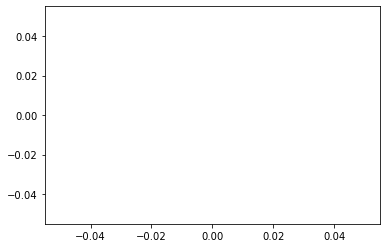

In [39]:
# Train the neural network on our training data.
model.fit(train['x'], train['y'], epochs=500)

Epoch 1/500
13/13 [==============================] - 0s 750us/step - loss: nan                
Epoch 2/500
13/13 [==============================] - 0s 833us/step - loss: nan
Epoch 3/500
13/13 [==============================] - 0s 583us/step - loss: nan
Epoch 4/500
13/13 [==============================] - 0s 667us/step - loss: nan
Epoch 5/500
13/13 [==============================] - 0s 584us/step - loss: nan
Epoch 6/500
13/13 [==============================] - 0s 584us/step - loss: nan
Epoch 7/500
13/13 [==============================] - 0s 750us/step - loss: nan
Epoch 8/500
13/13 [==============================] - 0s 750us/step - loss: nan
Epoch 9/500
13/13 [==============================] - 0s 667us/step - loss: nan
Epoch 10/500
13/13 [==============================] - 0s 583us/step - loss: nan
Epoch 11/500
13/13 [==============================] - 0s 667us/step - loss: nan
Epoch 12/500
13/13 [==============================] - 0s 583us/step - loss: nan
Epoch 13/500
13/13 [=============

13/13 [==============================] - 0s 667us/step - loss: nan
Epoch 205/500
13/13 [==============================] - 0s 583us/step - loss: nan
Epoch 206/500
13/13 [==============================] - 0s 667us/step - loss: nan
Epoch 207/500
13/13 [==============================] - 0s 750us/step - loss: nan
Epoch 208/500
13/13 [==============================] - 0s 583us/step - loss: nan
Epoch 209/500
13/13 [==============================] - 0s 750us/step - loss: nan
Epoch 210/500
13/13 [==============================] - 0s 584us/step - loss: nan
Epoch 211/500
13/13 [==============================] - 0s 667us/step - loss: nan
Epoch 212/500
13/13 [==============================] - 0s 667us/step - loss: nan
Epoch 213/500
13/13 [==============================] - 0s 583us/step - loss: nan
Epoch 214/500
13/13 [==============================] - 0s 750us/step - loss: nan
Epoch 215/500
13/13 [==============================] - 0s 500us/step - loss: nan
Epoch 216/500
13/13 [=====================

13/13 [==============================] - 0s 667us/step - loss: nan
Epoch 407/500
13/13 [==============================] - 0s 583us/step - loss: nan
Epoch 408/500
13/13 [==============================] - 0s 667us/step - loss: nan
Epoch 409/500
13/13 [==============================] - 0s 667us/step - loss: nan
Epoch 410/500
13/13 [==============================] - 0s 750us/step - loss: nan
Epoch 411/500
13/13 [==============================] - 0s 667us/step - loss: nan
Epoch 412/500
13/13 [==============================] - 0s 583us/step - loss: nan
Epoch 413/500
13/13 [==============================] - 0s 750us/step - loss: nan
Epoch 414/500
13/13 [==============================] - 0s 584us/step - loss: nan
Epoch 415/500
13/13 [==============================] - 0s 750us/step - loss: nan
Epoch 416/500
13/13 [==============================] - 0s 667us/step - loss: nan
Epoch 417/500
13/13 [==============================] - 0s 584us/step - loss: nan
Epoch 418/500
13/13 [=====================

In [43]:
# Just 2 inputs for now.
def neuron(x1, w1, b, x2, w2):  # where x =4  w = .5 b = .1
    return b + x1 * w1 + x2 *w2

In [44]:
neuron(00.40, 0.25, 5, 5.186,-2 )

-5.272

In [45]:
class Neuron:
    # This is the constructor.
    def __init__(self, winit, binit):
        self.w1 = w1init
        self.b = binit
        self.w2 = w2init
    
    # The neuron takes an input and gives an output.
    # Uses the internal state (the weight and bias).
    def fire(self, x):
        return self.b + x * self.w + x2 * self.w2